In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy.io

2025-01-05 23:38:56.670580: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-05 23:38:56.716096: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-05 23:38:56.716119: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-05 23:38:56.717182: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-05 23:38:56.723979: I tensorflow/core/platform/cpu_feature_guar

In [2]:
model = tf.keras.models.load_model('X70_Model.keras') 

2025-01-05 22:23:49.978452: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [21]:
import keras
keras.__version__

'3.2.0'

In [22]:
df = pd.read_csv('x70_combined.csv')
df = df.drop('Label',axis=1)
df = df[df['P']>0]
df = df[((df['P']>0) & (df['P']<7)) | (df['P']>30)] 
#sorting out dummies

X = df.drop('dadN',axis=1)
y = df['dadN']

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#shuffling may be optional as we are scaling only not training
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model

# Define the range and step sizes for K and P
K_range = np.arange(10.1, 27.1, 0.1)  # K from 10.1 to 27 in steps of 0.1
P_range = np.arange(5.5, 34.5, 0.5)  # P from 5.5 to 34 in steps of 0.5

K, P = np.meshgrid(K_range, P_range)
K = K.flatten()  
P = P.flatten()

# Create a dataframe from the grid
prediction_df = pd.DataFrame({
    'K': K,
    'P': P
})


# Scale the features
X_scaled = scaler.transform(prediction_df.values)


# Make predictions
predictions = model.predict(X_scaled)

# Add predictions to the dataframe
prediction_df['dadN_predicted'] = predictions.flatten()

# Save the dataframe with predictions
prediction_df.to_csv('Predictions_K_P_Range.csv', index=False)

print(prediction_df.head())


  1/309 ━━━━━━━━━━━━━━━━━━━━ 36s 120ms/step

/usr/local/lib64/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step
      K    P  dadN_predicted
0  10.1  5.5        0.000004
1  10.2  5.5        0.000004
2  10.3  5.5        0.000004
3  10.4  5.5        0.000007
4  10.5  5.5        0.000009


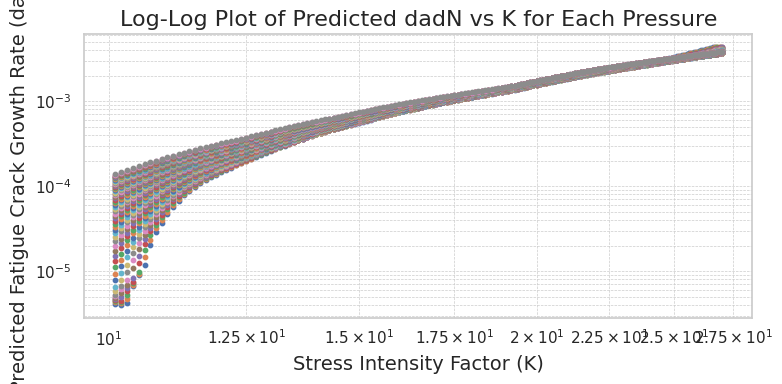

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the predictions dataframe
prediction_df = pd.read_csv('Predictions_K_P_Range.csv')

# Plot log-log graph for each unique pressure (P)
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")

# Loop through each unique pressure level
for P_value in prediction_df['P'].unique():
    subset = prediction_df[prediction_df['P'] == P_value]
    plt.scatter(subset['K'], subset['dadN_predicted'], label=f'P = {P_value} MPa', s=10)

# Configure the log-log plot
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Stress Intensity Factor (K)', fontsize=14)
plt.ylabel('Predicted Fatigue Crack Growth Rate (dadN)', fontsize=14)
plt.title('Log-Log Plot of Predicted dadN vs K for Each Pressure', fontsize=16)

plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()
